In [ ]:
pip install node2vec

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 15.8 MB/s eta 0:00:00
  Attempting uninstall: networkx
    Found existing installation: networkx 3.3
    Uninstalling networkx-3.3:
      Successfully uninstalled networkx-3.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.2.1+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.2.1+cu121 requires nvidia-cuda-cupti-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.2.1+cu121 requires nvidia-cuda-nvrtc-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.2.1+cu121 requires nvidia-cuda-runtime-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.2.

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
human_dna = pd.read_table('/content/human.txt')
print(human_dna.head())
print('total number of sequence data', len(human_dna.sequence))
print('sequence data sample:', human_dna.sequence[0])

                                            sequence  class
0  ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...      4
1  ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...      4
2  ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...      3
3  ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...      3
4  ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...      3
total number of sequence data 4380
sequence data sample: ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCATACTCCTTACACTATTCCTCATCACCCAACTAAAAATATTAAACACAAACTACCACCTACCTCCCTCACCAAAGCCCATAAAAATAAAAAATTATAACAAACCCTGAGAACCAAAATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG


In [ ]:
def get_kmer_count_from_sequence(sequence, k=3, cyclic=True):
    """
    Returns dictionary with keys representing all possible kmers in a sequence
    and values counting their occurrence in the sequence.
    """
    # dict to store kmers
    kmers = {}


    # count how many times each occurred in this sequence (treated as cyclic)
    for i in range(0, len(sequence)):
        kmer = sequence[i:i + k]

        # for cyclic sequence get kmers that wrap from end to beginning
        length = len(kmer)
        if cyclic:
            if len(kmer) != k:
                kmer += sequence[:(k - length)]

        # if not cyclic then skip kmers at end of sequence
        else:
            if len(kmer) != k:
                continue

        # count occurrence of this kmer in sequence
        if kmer in kmers:
            kmers[kmer] += 1
        else:
            kmers[kmer] = 1

    return kmers

def get_debruijn_edges_from_kmers(kmers):
    """
    Every possible (k-1)mer (n-1 suffix and prefix of kmers) is assigned
    to a node, and we connect one node to another if the (k-1)mer overlaps
    another. Nodes are (k-1)mers, edges are kmers.
    """
    # store edges as tuples in a set
    edges = set()

    # compare each (k-1)mer
    for k1 in kmers:
        for k2 in kmers:
            if k1 != k2:
                # if they overlap then add to edges
                if k1[1:] == k2[:-1]:
                    edges.add((k1[:-1], k2[:-1]))
                if k1[:-1] == k2[1:]:
                    edges.add((k2[:-1], k1[:-1]))

    return edges

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
graph_list_k10 = []
count = 0
for seq in human_dna.sequence[:400]:
  count = count + 1
  kmers = get_kmer_count_from_sequence(seq, k=10) #setting k = 10
  edges = get_debruijn_edges_from_kmers(kmers)
  graph = nx.DiGraph()
  graph.add_edges_from(edges)
  graph_list_k10.append(graph)
  print('graph complemeted', count)


graph complemeted 1
graph complemeted 2
graph complemeted 3
graph complemeted 4
graph complemeted 5
graph complemeted 6
graph complemeted 7
graph complemeted 8
graph complemeted 9
graph complemeted 10
graph complemeted 11
graph complemeted 12
graph complemeted 13
graph complemeted 14
graph complemeted 15
graph complemeted 16
graph complemeted 17
graph complemeted 18
graph complemeted 19
graph complemeted 20
graph complemeted 21
graph complemeted 22
graph complemeted 23
graph complemeted 24
graph complemeted 25
graph complemeted 26
graph complemeted 27
graph complemeted 28
graph complemeted 29
graph complemeted 30
graph complemeted 31
graph complemeted 32
graph complemeted 33
graph complemeted 34
graph complemeted 35
graph complemeted 36
graph complemeted 37
graph complemeted 38
graph complemeted 39
graph complemeted 40
graph complemeted 41
graph complemeted 42
graph complemeted 43
graph complemeted 44
graph complemeted 45
graph complemeted 46
graph complemeted 47
graph complemeted 48
g

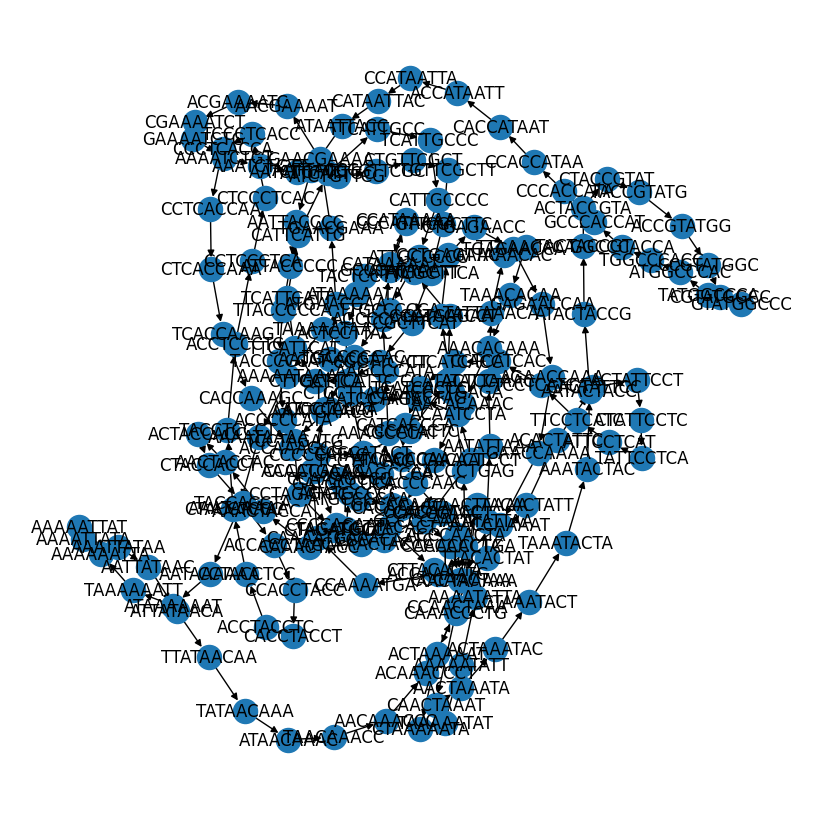

In [ ]:
#graph example

plt.figure(figsize=(8, 8))
nx.draw(graph_list_k10[0],pos = nx.spring_layout(graph_list_k10[0]),with_labels = True)

In [ ]:
from node2vec import Node2Vec
print('total number of graphs', len(graph_list_k10))
count = 1
embedding_model_list_k10_1 = []
graph_list_k5_1 = graph_list_k10[:50]
for g in graph_list_k5_1:
  node2vec = Node2Vec(g, dimensions=64, walk_length=30, num_walks=200, workers=4)
  model = node2vec.fit(window=10, min_count=1, batch_words=4)
  embeddings = {node: model.wv[node] for node in g.nodes()}
  embedding_model_list_k10_1.append(embeddings)
  print('embeddings', count)
  count = count+1


total number of graphs 400


Computing transition probabilities:   0%|          | 0/205 [00:00<?, ?it/s]

embeddings 1


Computing transition probabilities:   0%|          | 0/675 [00:00<?, ?it/s]

embeddings 2


Computing transition probabilities:   0%|          | 0/1673 [00:00<?, ?it/s]

embeddings 3


Computing transition probabilities:   0%|          | 0/1197 [00:00<?, ?it/s]

embeddings 4


Computing transition probabilities:   0%|          | 0/1429 [00:00<?, ?it/s]

embeddings 5


Computing transition probabilities:   0%|          | 0/1673 [00:00<?, ?it/s]

embeddings 6


Computing transition probabilities:   0%|          | 0/1612 [00:00<?, ?it/s]

embeddings 7


Computing transition probabilities:   0%|          | 0/1429 [00:00<?, ?it/s]

embeddings 8


Computing transition probabilities:   0%|          | 0/1612 [00:00<?, ?it/s]

embeddings 9


Computing transition probabilities:   0%|          | 0/640 [00:00<?, ?it/s]

embeddings 10


Computing transition probabilities:   0%|          | 0/484 [00:00<?, ?it/s]

embeddings 11


Computing transition probabilities:   0%|          | 0/354 [00:00<?, ?it/s]

embeddings 12


Computing transition probabilities:   0%|          | 0/189 [00:00<?, ?it/s]

embeddings 13


Computing transition probabilities:   0%|          | 0/98 [00:00<?, ?it/s]

embeddings 14


Computing transition probabilities:   0%|          | 0/85 [00:00<?, ?it/s]

embeddings 15


Computing transition probabilities:   0%|          | 0/1673 [00:00<?, ?it/s]

embeddings 16


Computing transition probabilities:   0%|          | 0/2577 [00:00<?, ?it/s]

embeddings 17


Computing transition probabilities:   0%|          | 0/2577 [00:00<?, ?it/s]

embeddings 18


Computing transition probabilities:   0%|          | 0/1647 [00:00<?, ?it/s]

embeddings 19


Computing transition probabilities:   0%|          | 0/2270 [00:00<?, ?it/s]

embeddings 20


Computing transition probabilities:   0%|          | 0/2408 [00:00<?, ?it/s]

embeddings 21


Computing transition probabilities:   0%|          | 0/2439 [00:00<?, ?it/s]

embeddings 22


Computing transition probabilities:   0%|          | 0/2482 [00:00<?, ?it/s]

embeddings 23


Computing transition probabilities:   0%|          | 0/3478 [00:00<?, ?it/s]

embeddings 24


Computing transition probabilities:   0%|          | 0/383 [00:00<?, ?it/s]

embeddings 25


Computing transition probabilities:   0%|          | 0/186 [00:00<?, ?it/s]

embeddings 26


Computing transition probabilities:   0%|          | 0/585 [00:00<?, ?it/s]

embeddings 27


Computing transition probabilities:   0%|          | 0/3478 [00:00<?, ?it/s]

embeddings 28


Computing transition probabilities:   0%|          | 0/1339 [00:00<?, ?it/s]

embeddings 29


Computing transition probabilities:   0%|          | 0/1562 [00:00<?, ?it/s]

embeddings 30


Computing transition probabilities:   0%|          | 0/2131 [00:00<?, ?it/s]

embeddings 31


Computing transition probabilities:   0%|          | 0/2111 [00:00<?, ?it/s]

embeddings 32


Computing transition probabilities:   0%|          | 0/2261 [00:00<?, ?it/s]

embeddings 33


Computing transition probabilities:   0%|          | 0/1893 [00:00<?, ?it/s]

embeddings 34


Computing transition probabilities:   0%|          | 0/994 [00:00<?, ?it/s]

embeddings 35


Computing transition probabilities:   0%|          | 0/315 [00:00<?, ?it/s]

embeddings 36


Computing transition probabilities:   0%|          | 0/2261 [00:00<?, ?it/s]

embeddings 37


Computing transition probabilities:   0%|          | 0/1776 [00:00<?, ?it/s]

embeddings 38


Computing transition probabilities:   0%|          | 0/525 [00:00<?, ?it/s]

embeddings 39


Computing transition probabilities:   0%|          | 0/1746 [00:00<?, ?it/s]

embeddings 40


Computing transition probabilities:   0%|          | 0/892 [00:00<?, ?it/s]

embeddings 41


Computing transition probabilities:   0%|          | 0/888 [00:00<?, ?it/s]

embeddings 42


Computing transition probabilities:   0%|          | 0/541 [00:00<?, ?it/s]

embeddings 43


Computing transition probabilities:   0%|          | 0/1193 [00:00<?, ?it/s]

embeddings 44


Computing transition probabilities:   0%|          | 0/691 [00:00<?, ?it/s]

embeddings 45


Computing transition probabilities:   0%|          | 0/3129 [00:00<?, ?it/s]

embeddings 46


Computing transition probabilities:   0%|          | 0/246 [00:00<?, ?it/s]

embeddings 47


Computing transition probabilities:   0%|          | 0/405 [00:00<?, ?it/s]

embeddings 48


Computing transition probabilities:   0%|          | 0/438 [00:00<?, ?it/s]

embeddings 49


Computing transition probabilities:   0%|          | 0/49 [00:00<?, ?it/s]

embeddings 50


In [ ]:
#converting to list of input vectors
input_vector_list_k10_1 = []
for e in embedding_model_list_k10_1:
  input_vector = [0] * 64
  for node in e:
    for i in range(0,64):
      input_vector[i] = input_vector[i] + e[node][i]
  input_vector_list_k10_1.append(input_vector)

print('total number of input vectors:', len(input_vector_list_k10_1))
print('input vector example:')
print(input_vector_list_k10_1[0])


total number of input vectors: 50
input vector example:
[58.864151168148965, -102.63533818186261, 66.93175420747139, 122.96175300003961, -15.193869141396135, 28.33801744657103, 21.353628775803372, -71.9509271509014, -103.29319208930247, -25.183270141482353, 41.192446981556714, 19.113560100493487, -16.889217557385564, -49.92607164965011, 55.52086390904151, 88.17329304525629, -23.885253133805236, -13.586176532087848, 40.088143985834904, 90.86954292398877, 43.12194626615383, 58.61117697565351, 64.4250536954205, -88.44313911930658, -29.757479556370527, 52.649739945663896, -35.58931973029394, 2.629987739434, 72.74384975945577, -89.61847562342882, 87.29039123654366, -10.686684248736128, 35.68698905268684, 16.493272843887098, -18.230276687903824, -70.66436652303673, 39.44747375277802, -38.03516549617052, -66.85404820786789, 4.526525340857916, 2.5000342605635524, 28.126105203991756, -4.334229527623393, -14.577857183292508, 101.86365131288767, -34.016592264175415, -2.0479649341432378, 22.400660

In [ ]:
#to store in csv file
import csv
file_name = 'vector_list_k10.csv'
column = []
for i in range(1,65):
  column.append('x'+str(i))
with open(file_name, 'w', newline = '' )as csvfile:
    csv_writer = csv.writer(csvfile)
    csv_writer.writerow(column)
    csv_writer.writerows(input_vector_list_k10_1)

In [ ]:
from node2vec import Node2Vec
print('total number of graphs', len(graph_list_k10))
count = 1
embedding_model_list_k10_2 = []
graph_list_k5_2 = graph_list_k10[50:100]
for g in graph_list_k5_2:
  node2vec = Node2Vec(g, dimensions=64, walk_length=30, num_walks=200, workers=4)
  model = node2vec.fit(window=10, min_count=1, batch_words=4)
  embeddings = {node: model.wv[node] for node in g.nodes()}
  embedding_model_list_k10_2.append(embeddings)
  print('embeddings', count)
  count = count+1


total number of graphs 400


Computing transition probabilities:   0%|          | 0/1578 [00:00<?, ?it/s]

embeddings 1


Computing transition probabilities:   0%|          | 0/1161 [00:00<?, ?it/s]

embeddings 2


Computing transition probabilities:   0%|          | 0/151 [00:00<?, ?it/s]

embeddings 3


Computing transition probabilities:   0%|          | 0/528 [00:00<?, ?it/s]

embeddings 4


Computing transition probabilities:   0%|          | 0/602 [00:00<?, ?it/s]

embeddings 5


Computing transition probabilities:   0%|          | 0/1920 [00:00<?, ?it/s]

embeddings 6


Computing transition probabilities:   0%|          | 0/2007 [00:00<?, ?it/s]

embeddings 7


Computing transition probabilities:   0%|          | 0/486 [00:00<?, ?it/s]

embeddings 8


Computing transition probabilities:   0%|          | 0/477 [00:00<?, ?it/s]

embeddings 9


Computing transition probabilities:   0%|          | 0/658 [00:00<?, ?it/s]

embeddings 10


Computing transition probabilities:   0%|          | 0/940 [00:00<?, ?it/s]

embeddings 11


Computing transition probabilities:   0%|          | 0/1924 [00:00<?, ?it/s]

embeddings 12


Computing transition probabilities:   0%|          | 0/1927 [00:00<?, ?it/s]

embeddings 13


Computing transition probabilities:   0%|          | 0/238 [00:00<?, ?it/s]

embeddings 14


Computing transition probabilities:   0%|          | 0/151 [00:00<?, ?it/s]

embeddings 15


Computing transition probabilities:   0%|          | 0/288 [00:00<?, ?it/s]

embeddings 16


Computing transition probabilities:   0%|          | 0/638 [00:00<?, ?it/s]

embeddings 17


Computing transition probabilities:   0%|          | 0/285 [00:00<?, ?it/s]

embeddings 18


Computing transition probabilities:   0%|          | 0/1920 [00:00<?, ?it/s]

embeddings 19


Computing transition probabilities:   0%|          | 0/1778 [00:00<?, ?it/s]

embeddings 20


Computing transition probabilities:   0%|          | 0/190 [00:00<?, ?it/s]

embeddings 21


Computing transition probabilities:   0%|          | 0/758 [00:00<?, ?it/s]

embeddings 22


Computing transition probabilities:   0%|          | 0/387 [00:00<?, ?it/s]

embeddings 23


Computing transition probabilities:   0%|          | 0/1719 [00:00<?, ?it/s]

embeddings 24


Computing transition probabilities:   0%|          | 0/1420 [00:00<?, ?it/s]

embeddings 25


Computing transition probabilities:   0%|          | 0/1617 [00:00<?, ?it/s]

embeddings 26


Computing transition probabilities:   0%|          | 0/1671 [00:00<?, ?it/s]

embeddings 27


Computing transition probabilities:   0%|          | 0/1758 [00:00<?, ?it/s]

embeddings 28


Computing transition probabilities:   0%|          | 0/52 [00:00<?, ?it/s]

embeddings 29


Computing transition probabilities:   0%|          | 0/267 [00:00<?, ?it/s]

embeddings 30


Computing transition probabilities:   0%|          | 0/4692 [00:00<?, ?it/s]

embeddings 31


Computing transition probabilities:   0%|          | 0/4759 [00:00<?, ?it/s]

embeddings 32


Computing transition probabilities:   0%|          | 0/689 [00:00<?, ?it/s]

embeddings 33


Computing transition probabilities:   0%|          | 0/4469 [00:00<?, ?it/s]

embeddings 34


Computing transition probabilities:   0%|          | 0/1507 [00:00<?, ?it/s]

embeddings 35


Computing transition probabilities:   0%|          | 0/4074 [00:00<?, ?it/s]

embeddings 36


Computing transition probabilities:   0%|          | 0/901 [00:00<?, ?it/s]

embeddings 37


Computing transition probabilities:   0%|          | 0/411 [00:00<?, ?it/s]

embeddings 38


Computing transition probabilities:   0%|          | 0/4809 [00:00<?, ?it/s]

embeddings 39


Computing transition probabilities:   0%|          | 0/1993 [00:00<?, ?it/s]

embeddings 40


Computing transition probabilities:   0%|          | 0/2100 [00:00<?, ?it/s]

embeddings 41


Computing transition probabilities:   0%|          | 0/2029 [00:00<?, ?it/s]

embeddings 42


Computing transition probabilities:   0%|          | 0/1981 [00:00<?, ?it/s]

embeddings 43


Computing transition probabilities:   0%|          | 0/2100 [00:00<?, ?it/s]

embeddings 44


Computing transition probabilities:   0%|          | 0/2029 [00:00<?, ?it/s]

embeddings 45


Computing transition probabilities:   0%|          | 0/472 [00:00<?, ?it/s]

embeddings 46


Computing transition probabilities:   0%|          | 0/177 [00:00<?, ?it/s]

embeddings 47


Computing transition probabilities:   0%|          | 0/1600 [00:00<?, ?it/s]

embeddings 48


Computing transition probabilities:   0%|          | 0/1332 [00:00<?, ?it/s]

embeddings 49


Computing transition probabilities:   0%|          | 0/1529 [00:00<?, ?it/s]

embeddings 50


In [ ]:
#converting to list of input vectors
input_vector_list_k10_2 = []
for e in embedding_model_list_k10_2:
  input_vector = [0] * 64
  for node in e:
    for i in range(0,64):
      input_vector[i] = input_vector[i] + e[node][i]
  input_vector_list_k10_2.append(input_vector)

print('total number of input vectors:', len(input_vector_list_k10_2))
print('input vector example:')
print(input_vector_list_k10_2[0])


total number of input vectors: 50
input vector example:
[1272.750161724398, -708.9662786358676, 245.35797789125354, -42.302558672614396, 583.5678973164177, -720.1248857870232, -25.24163453100482, -768.1494965224992, -292.52923000933515, -10.54931072134059, -403.1704936976603, -358.317562711949, 388.3864412066905, -984.0852975039452, -25.198398239477683, 367.9338601333111, -1139.4140629987232, 153.3518871503329, -8.798296625725925, 1055.799821364344, 786.1068362699589, 717.9171755758871, -1023.4854146493599, -1632.6521000647917, -160.3385514165875, 691.1714226241456, -1113.2609781143256, 207.4655354970655, -591.7794727705768, 369.5074055385194, -118.34475189010845, 187.42212437992566, -203.88328045571689, -388.6592575147224, 955.0176637002733, 203.17458892360446, -17.564972886815667, -214.3540507965663, -174.66691257158527, 220.76222463010345, 51.7596691136423, 987.4769783926895, -991.9181880226242, 324.3129387455265, 720.4476757524244, -492.49967002008634, 84.10518860371667, -890.44231

In [ ]:
#to store in csv file
import csv
file_name = 'vector_list_k10.csv'

with open(file_name, 'a', newline = '' )as csvfile:
    csv_writer = csv.writer(csvfile)
    csv_writer.writerows(input_vector_list_k10_2)

In [ ]:
from node2vec import Node2Vec
print('total number of graphs', len(graph_list_k10))
count = 1
embedding_model_list_k10_3 = []
graph_list_k5_3 = graph_list_k10[100:150]
for g in graph_list_k5_3:
  node2vec = Node2Vec(g, dimensions=64, walk_length=30, num_walks=200, workers=4)
  model = node2vec.fit(window=10, min_count=1, batch_words=4)
  embeddings = {node: model.wv[node] for node in g.nodes()}
  embedding_model_list_k10_3.append(embeddings)
  print('embeddings', count)
  count = count+1


total number of graphs 400


Computing transition probabilities:   0%|          | 0/947 [00:00<?, ?it/s]

embeddings 1


Computing transition probabilities:   0%|          | 0/1016 [00:00<?, ?it/s]

embeddings 2


Computing transition probabilities:   0%|          | 0/147 [00:00<?, ?it/s]

embeddings 3


Computing transition probabilities:   0%|          | 0/135 [00:00<?, ?it/s]

embeddings 4


Computing transition probabilities:   0%|          | 0/1402 [00:00<?, ?it/s]

embeddings 5


Computing transition probabilities:   0%|          | 0/1402 [00:00<?, ?it/s]

embeddings 6


Computing transition probabilities:   0%|          | 0/502 [00:00<?, ?it/s]

embeddings 7


Computing transition probabilities:   0%|          | 0/808 [00:00<?, ?it/s]

embeddings 8


Computing transition probabilities:   0%|          | 0/568 [00:00<?, ?it/s]

embeddings 9


Computing transition probabilities:   0%|          | 0/3224 [00:00<?, ?it/s]

embeddings 10


Computing transition probabilities:   0%|          | 0/3833 [00:00<?, ?it/s]

embeddings 11


Computing transition probabilities:   0%|          | 0/1436 [00:00<?, ?it/s]

embeddings 12


Computing transition probabilities:   0%|          | 0/946 [00:00<?, ?it/s]

embeddings 13


Computing transition probabilities:   0%|          | 0/1216 [00:00<?, ?it/s]

embeddings 14


Computing transition probabilities:   0%|          | 0/1725 [00:00<?, ?it/s]

embeddings 15


Computing transition probabilities:   0%|          | 0/1369 [00:00<?, ?it/s]

embeddings 16


Computing transition probabilities:   0%|          | 0/954 [00:00<?, ?it/s]

embeddings 17


Computing transition probabilities:   0%|          | 0/954 [00:00<?, ?it/s]

embeddings 18


Computing transition probabilities:   0%|          | 0/1326 [00:00<?, ?it/s]

embeddings 19


Computing transition probabilities:   0%|          | 0/1151 [00:00<?, ?it/s]

embeddings 20


Computing transition probabilities:   0%|          | 0/926 [00:00<?, ?it/s]

embeddings 21


Computing transition probabilities:   0%|          | 0/1042 [00:00<?, ?it/s]

embeddings 22


Computing transition probabilities:   0%|          | 0/1151 [00:00<?, ?it/s]

embeddings 23


Computing transition probabilities:   0%|          | 0/1148 [00:00<?, ?it/s]

embeddings 24


Computing transition probabilities:   0%|          | 0/213 [00:00<?, ?it/s]

embeddings 25


Computing transition probabilities:   0%|          | 0/344 [00:00<?, ?it/s]

embeddings 26


Computing transition probabilities:   0%|          | 0/743 [00:00<?, ?it/s]

embeddings 27


Computing transition probabilities:   0%|          | 0/617 [00:00<?, ?it/s]

embeddings 28


Computing transition probabilities:   0%|          | 0/660 [00:00<?, ?it/s]

embeddings 29


Computing transition probabilities:   0%|          | 0/268 [00:00<?, ?it/s]

embeddings 30


Computing transition probabilities:   0%|          | 0/201 [00:00<?, ?it/s]

embeddings 31


Computing transition probabilities:   0%|          | 0/138 [00:00<?, ?it/s]

embeddings 32


Computing transition probabilities:   0%|          | 0/82 [00:00<?, ?it/s]

embeddings 33


Computing transition probabilities:   0%|          | 0/257 [00:00<?, ?it/s]

embeddings 34


Computing transition probabilities:   0%|          | 0/1246 [00:00<?, ?it/s]

embeddings 35


Computing transition probabilities:   0%|          | 0/1444 [00:00<?, ?it/s]

embeddings 36


Computing transition probabilities:   0%|          | 0/1056 [00:00<?, ?it/s]

embeddings 37


Computing transition probabilities:   0%|          | 0/815 [00:00<?, ?it/s]

embeddings 38


Computing transition probabilities:   0%|          | 0/1315 [00:00<?, ?it/s]

embeddings 39


Computing transition probabilities:   0%|          | 0/139 [00:00<?, ?it/s]

embeddings 40


Computing transition probabilities:   0%|          | 0/676 [00:00<?, ?it/s]

embeddings 41


Computing transition probabilities:   0%|          | 0/264 [00:00<?, ?it/s]

embeddings 42


Computing transition probabilities:   0%|          | 0/367 [00:00<?, ?it/s]

embeddings 43


Computing transition probabilities:   0%|          | 0/474 [00:00<?, ?it/s]

embeddings 44


Computing transition probabilities:   0%|          | 0/221 [00:00<?, ?it/s]

embeddings 45


Computing transition probabilities:   0%|          | 0/346 [00:00<?, ?it/s]

embeddings 46


Computing transition probabilities:   0%|          | 0/1476 [00:00<?, ?it/s]

embeddings 47


Computing transition probabilities:   0%|          | 0/1476 [00:00<?, ?it/s]

embeddings 48


Computing transition probabilities:   0%|          | 0/321 [00:00<?, ?it/s]

embeddings 49


Computing transition probabilities:   0%|          | 0/244 [00:00<?, ?it/s]

embeddings 50


In [ ]:
#converting to list of input vectors
input_vector_list_k10_3 = []
for e in embedding_model_list_k10_3:
  input_vector = [0] * 64
  for node in e:
    for i in range(0,64):
      input_vector[i] = input_vector[i] + e[node][i]
  input_vector_list_k10_3.append(input_vector)

print('total number of input vectors:', len(input_vector_list_k10_2))
print('input vector example:')
print(input_vector_list_k10_3[0])


total number of input vectors: 50
input vector example:
[285.3920267661306, -322.20999917865265, -76.81956704799086, 509.5436010452686, 448.809387405694, -459.34652913268656, 251.97774207341718, -247.3489917467814, -482.0904401857406, 47.14944550325163, 324.62557318399195, -110.805499080132, -500.901564613363, -213.03133127000183, -20.500402809819207, 709.7858697004849, -558.952397686895, -280.8234557665419, -134.62965453608194, 721.6615838111029, 401.22541130532045, 298.35932119816425, -308.2628507328336, -771.7871915746946, -273.37231232068734, 294.32728417165345, -359.45633578919296, -162.11515689917724, 423.66431445872877, -535.8664811413037, -40.41318159154616, -90.05552248246386, 212.83355081669288, -506.9875856610888, -16.688128586276434, 291.23714847746305, 143.11177570020664, -184.60392046358902, -101.74083269527182, 198.30409414562746, -226.89167785044992, 280.8133680704632, -204.63273850738187, 168.30597497094277, 708.3902958019171, 147.10542209277628, -259.2533797909855, -5

In [ ]:
#to store in csv file
import csv
file_name = 'vector_list_k10.csv'

with open(file_name, 'a', newline = '' )as csvfile:
    csv_writer = csv.writer(csvfile)
    csv_writer.writerows(input_vector_list_k10_3)

In [ ]:
from node2vec import Node2Vec
print('total number of graphs', len(graph_list_k10))
count = 1
embedding_model_list_k10_4 = []
graph_list_k5_4 = graph_list_k10[150:200]
for g in graph_list_k5_4:
  node2vec = Node2Vec(g, dimensions=64, walk_length=30, num_walks=200, workers=4)
  model = node2vec.fit(window=10, min_count=1, batch_words=4)
  embeddings = {node: model.wv[node] for node in g.nodes()}
  embedding_model_list_k10_4.append(embeddings)
  print('embeddings', count)
  count = count+1


total number of graphs 400


Computing transition probabilities:   0%|          | 0/1371 [00:00<?, ?it/s]

embeddings 1


Computing transition probabilities:   0%|          | 0/123 [00:00<?, ?it/s]

embeddings 2


Computing transition probabilities:   0%|          | 0/155 [00:00<?, ?it/s]

embeddings 3


Computing transition probabilities:   0%|          | 0/623 [00:00<?, ?it/s]

embeddings 4


Computing transition probabilities:   0%|          | 0/264 [00:00<?, ?it/s]

embeddings 5


Computing transition probabilities:   0%|          | 0/1766 [00:00<?, ?it/s]

embeddings 6


Computing transition probabilities:   0%|          | 0/2804 [00:00<?, ?it/s]

embeddings 7


Computing transition probabilities:   0%|          | 0/2884 [00:00<?, ?it/s]

embeddings 8


Computing transition probabilities:   0%|          | 0/413 [00:00<?, ?it/s]

embeddings 9


Computing transition probabilities:   0%|          | 0/2621 [00:00<?, ?it/s]

embeddings 10


Computing transition probabilities:   0%|          | 0/375 [00:00<?, ?it/s]

embeddings 11


Computing transition probabilities:   0%|          | 0/373 [00:00<?, ?it/s]

embeddings 12


Computing transition probabilities:   0%|          | 0/497 [00:00<?, ?it/s]

embeddings 13


Computing transition probabilities:   0%|          | 0/260 [00:00<?, ?it/s]

embeddings 14


Computing transition probabilities:   0%|          | 0/201 [00:00<?, ?it/s]

embeddings 15


Computing transition probabilities:   0%|          | 0/158 [00:00<?, ?it/s]

embeddings 16


Computing transition probabilities:   0%|          | 0/2101 [00:00<?, ?it/s]

embeddings 17


Computing transition probabilities:   0%|          | 0/2798 [00:00<?, ?it/s]

embeddings 18


Computing transition probabilities:   0%|          | 0/5509 [00:00<?, ?it/s]

embeddings 19


Computing transition probabilities:   0%|          | 0/5483 [00:00<?, ?it/s]

embeddings 20


Computing transition probabilities:   0%|          | 0/785 [00:00<?, ?it/s]

embeddings 21


Computing transition probabilities:   0%|          | 0/3762 [00:00<?, ?it/s]

embeddings 22


Computing transition probabilities:   0%|          | 0/4505 [00:00<?, ?it/s]

embeddings 23


Computing transition probabilities:   0%|          | 0/3863 [00:00<?, ?it/s]

embeddings 24


Computing transition probabilities:   0%|          | 0/2856 [00:00<?, ?it/s]

embeddings 25


Computing transition probabilities:   0%|          | 0/786 [00:00<?, ?it/s]

embeddings 26


Computing transition probabilities:   0%|          | 0/2374 [00:00<?, ?it/s]

embeddings 27


Computing transition probabilities:   0%|          | 0/1500 [00:00<?, ?it/s]

embeddings 28


Computing transition probabilities:   0%|          | 0/3936 [00:00<?, ?it/s]

embeddings 29


Computing transition probabilities:   0%|          | 0/1589 [00:00<?, ?it/s]

embeddings 30


Computing transition probabilities:   0%|          | 0/351 [00:00<?, ?it/s]

embeddings 31


Computing transition probabilities:   0%|          | 0/430 [00:00<?, ?it/s]

embeddings 32


Computing transition probabilities:   0%|          | 0/3939 [00:00<?, ?it/s]

embeddings 33


Computing transition probabilities:   0%|          | 0/3951 [00:00<?, ?it/s]

embeddings 34


Computing transition probabilities:   0%|          | 0/150 [00:00<?, ?it/s]

embeddings 35


Computing transition probabilities:   0%|          | 0/318 [00:00<?, ?it/s]

embeddings 36


Computing transition probabilities:   0%|          | 0/1353 [00:00<?, ?it/s]

embeddings 37


Computing transition probabilities:   0%|          | 0/249 [00:00<?, ?it/s]

embeddings 38


Computing transition probabilities:   0%|          | 0/1254 [00:00<?, ?it/s]

embeddings 39


Computing transition probabilities:   0%|          | 0/778 [00:00<?, ?it/s]

embeddings 40


Computing transition probabilities:   0%|          | 0/1154 [00:00<?, ?it/s]

embeddings 41


Computing transition probabilities:   0%|          | 0/896 [00:00<?, ?it/s]

embeddings 42


Computing transition probabilities:   0%|          | 0/327 [00:00<?, ?it/s]

embeddings 43


Computing transition probabilities:   0%|          | 0/327 [00:00<?, ?it/s]

embeddings 44


Computing transition probabilities:   0%|          | 0/180 [00:00<?, ?it/s]

embeddings 45


Computing transition probabilities:   0%|          | 0/705 [00:00<?, ?it/s]

embeddings 46


Computing transition probabilities:   0%|          | 0/272 [00:00<?, ?it/s]

embeddings 47


Computing transition probabilities:   0%|          | 0/845 [00:00<?, ?it/s]

embeddings 48


Computing transition probabilities:   0%|          | 0/767 [00:00<?, ?it/s]

embeddings 49


Computing transition probabilities:   0%|          | 0/1253 [00:00<?, ?it/s]

embeddings 50


In [ ]:
#converting to list of input vectors
input_vector_list_k10_4 = []
for e in embedding_model_list_k10_4:
  input_vector = [0] * 64
  for node in e:
    for i in range(0,64):
      input_vector[i] = input_vector[i] + e[node][i]
  input_vector_list_k10_4.append(input_vector)

print('total number of input vectors:', len(input_vector_list_k10_4))
print('input vector example:')
print(input_vector_list_k10_4[0])


total number of input vectors: 50
input vector example:
[516.6350958166295, -127.7239009658806, 260.51271916925907, -119.4088988036965, 873.0027730046422, -661.6796132692543, -141.76337244536262, -966.0472741904669, -447.0669297723798, -143.37949312885758, 122.14751639251153, -201.2550107986899, -273.8086366794305, -1141.0819607576414, -247.62559383769985, 855.3949916883721, -813.3953471878776, -371.0895185959489, -42.21583612629911, 848.5188226252794, 835.0317997819802, 258.2709490422858, -821.9133020389127, -786.7163781624404, -448.7315258518065, 279.22582536315895, -390.14432119217236, 21.535823430051096, -14.65913284040289, -47.41002694952476, -118.91449380171252, 533.4398192954541, 511.8984090280501, -213.4189227419556, -265.7091208763304, 455.2848293925126, 282.3588990995777, -520.8295743576018, -68.9872075663443, 453.4708649836539, 18.05548504408216, 966.9205827121768, -451.4441608545021, 170.5127275332925, 546.7697558805776, -782.5159126709914, 126.11785435394995, -748.68534040

In [ ]:
#to store in csv file
import csv
file_name = 'vector_list_k10.csv'

with open(file_name, 'a', newline = '' )as csvfile:
    csv_writer = csv.writer(csvfile)
    csv_writer.writerows(input_vector_list_k10_4)

In [ ]:
from node2vec import Node2Vec
print('total number of graphs', len(graph_list_k10))
count = 1
embedding_model_list_k10_5 = []
graph_list_k5_5 = graph_list_k10[200:250]
for g in graph_list_k5_5:
  node2vec = Node2Vec(g, dimensions=64, walk_length=30, num_walks=200, workers=4)
  model = node2vec.fit(window=10, min_count=1, batch_words=4)
  embeddings = {node: model.wv[node] for node in g.nodes()}
  embedding_model_list_k10_5.append(embeddings)
  print('embeddings', count)
  count = count+1


total number of graphs 400


Computing transition probabilities:   0%|          | 0/3461 [00:00<?, ?it/s]

embeddings 1


Computing transition probabilities:   0%|          | 0/3307 [00:00<?, ?it/s]

embeddings 2


Computing transition probabilities:   0%|          | 0/477 [00:00<?, ?it/s]

embeddings 3


Computing transition probabilities:   0%|          | 0/1445 [00:00<?, ?it/s]

embeddings 4


Computing transition probabilities:   0%|          | 0/3299 [00:00<?, ?it/s]

embeddings 5


Computing transition probabilities:   0%|          | 0/3415 [00:00<?, ?it/s]

embeddings 6


Computing transition probabilities:   0%|          | 0/873 [00:00<?, ?it/s]

embeddings 7


Computing transition probabilities:   0%|          | 0/479 [00:00<?, ?it/s]

embeddings 8


Computing transition probabilities:   0%|          | 0/409 [00:00<?, ?it/s]

embeddings 9


Computing transition probabilities:   0%|          | 0/1963 [00:00<?, ?it/s]

embeddings 10


Computing transition probabilities:   0%|          | 0/496 [00:00<?, ?it/s]

embeddings 11


Computing transition probabilities:   0%|          | 0/542 [00:00<?, ?it/s]

embeddings 12


Computing transition probabilities:   0%|          | 0/1186 [00:00<?, ?it/s]

embeddings 13


Computing transition probabilities:   0%|          | 0/2861 [00:00<?, ?it/s]

embeddings 14


Computing transition probabilities:   0%|          | 0/839 [00:00<?, ?it/s]

embeddings 15


Computing transition probabilities:   0%|          | 0/327 [00:00<?, ?it/s]

embeddings 16


Computing transition probabilities:   0%|          | 0/1032 [00:00<?, ?it/s]

embeddings 17


Computing transition probabilities:   0%|          | 0/839 [00:00<?, ?it/s]

embeddings 18


Computing transition probabilities:   0%|          | 0/204 [00:00<?, ?it/s]

embeddings 19


Computing transition probabilities:   0%|          | 0/392 [00:00<?, ?it/s]

embeddings 20


Computing transition probabilities:   0%|          | 0/1044 [00:00<?, ?it/s]

embeddings 21


Computing transition probabilities:   0%|          | 0/1032 [00:00<?, ?it/s]

embeddings 22


Computing transition probabilities:   0%|          | 0/1179 [00:00<?, ?it/s]

embeddings 23


Computing transition probabilities:   0%|          | 0/1200 [00:00<?, ?it/s]

embeddings 24


Computing transition probabilities:   0%|          | 0/1138 [00:00<?, ?it/s]

embeddings 25


Computing transition probabilities:   0%|          | 0/1207 [00:00<?, ?it/s]

embeddings 26


Computing transition probabilities:   0%|          | 0/1771 [00:00<?, ?it/s]

embeddings 27


Computing transition probabilities:   0%|          | 0/1603 [00:00<?, ?it/s]

embeddings 28


Computing transition probabilities:   0%|          | 0/1468 [00:00<?, ?it/s]

embeddings 29


Computing transition probabilities:   0%|          | 0/1468 [00:00<?, ?it/s]

embeddings 30


Computing transition probabilities:   0%|          | 0/990 [00:00<?, ?it/s]

embeddings 31


Computing transition probabilities:   0%|          | 0/413 [00:00<?, ?it/s]

embeddings 32


Computing transition probabilities:   0%|          | 0/1373 [00:00<?, ?it/s]

embeddings 33


Computing transition probabilities:   0%|          | 0/1373 [00:00<?, ?it/s]

embeddings 34


Computing transition probabilities:   0%|          | 0/1768 [00:00<?, ?it/s]

embeddings 35


Computing transition probabilities:   0%|          | 0/1768 [00:00<?, ?it/s]

embeddings 36


Computing transition probabilities:   0%|          | 0/411 [00:00<?, ?it/s]

embeddings 37


Computing transition probabilities:   0%|          | 0/384 [00:00<?, ?it/s]

embeddings 38


Computing transition probabilities:   0%|          | 0/300 [00:00<?, ?it/s]

embeddings 39


Computing transition probabilities:   0%|          | 0/411 [00:00<?, ?it/s]

embeddings 40


Computing transition probabilities:   0%|          | 0/333 [00:00<?, ?it/s]

embeddings 41


Computing transition probabilities:   0%|          | 0/296 [00:00<?, ?it/s]

embeddings 42


Computing transition probabilities:   0%|          | 0/1052 [00:00<?, ?it/s]

embeddings 43


Computing transition probabilities:   0%|          | 0/1052 [00:00<?, ?it/s]

embeddings 44


Computing transition probabilities:   0%|          | 0/1052 [00:00<?, ?it/s]

embeddings 45


Computing transition probabilities:   0%|          | 0/594 [00:00<?, ?it/s]

embeddings 46


Computing transition probabilities:   0%|          | 0/2718 [00:00<?, ?it/s]

embeddings 47


Computing transition probabilities:   0%|          | 0/2335 [00:00<?, ?it/s]

embeddings 48


Computing transition probabilities:   0%|          | 0/2201 [00:00<?, ?it/s]

embeddings 49


Computing transition probabilities:   0%|          | 0/2501 [00:00<?, ?it/s]

embeddings 50


In [ ]:
#converting to list of input vectors
input_vector_list_k10_5 = []
for e in embedding_model_list_k10_5:
  input_vector = [0] * 64
  for node in e:
    for i in range(0,64):
      input_vector[i] = input_vector[i] + e[node][i]
  input_vector_list_k10_5.append(input_vector)

print('total number of input vectors:', len(input_vector_list_k10_5))
print('input vector example:')
print(input_vector_list_k10_5[0])


total number of input vectors: 50
input vector example:
[1617.891028282378, -545.0244762974035, 1807.7584658261258, 405.7966930659459, 370.04252228786936, -1275.932909354451, -200.52412456899765, -982.1641134382371, -3201.771492378437, -168.56998169086, 2650.8363387096397, -1157.025625228002, -486.96954338264186, -1316.4127488806735, -831.6409655137113, 3383.442432805081, -2270.788109629706, -627.471996736509, -80.05945886727568, 2520.163949823269, 2425.865352015335, 947.341134082817, -1900.8540966045002, -1349.790481652588, -1902.5465657351888, 886.159117029456, -26.22263675017166, 242.9628881012177, -432.75224862250616, 779.5284598031849, -1109.4199597461848, 971.5464915201301, 995.8545881946338, -254.59343254833948, 166.88596248219255, 268.66428726821323, -983.2394363087515, -2715.0543077643088, -2096.0770706517624, -853.4689701554598, 1160.0511745859403, 639.3951525600569, -967.1172344420338, 1010.5833191098209, 572.0254641128122, -595.0659882468572, -2374.164775372774, 64.45774391

In [ ]:
#to store in csv file
import csv
file_name = 'vector_list_k10.csv'

with open(file_name, 'a', newline = '' )as csvfile:
    csv_writer = csv.writer(csvfile)
    csv_writer.writerows(input_vector_list_k10_5)

In [ ]:
from node2vec import Node2Vec
print('total number of graphs', len(graph_list_k10))
count = 1
embedding_model_list_k10_6 = []
graph_list_k5_6 = graph_list_k10[250:300]
for g in graph_list_k5_6:
  node2vec = Node2Vec(g, dimensions=64, walk_length=30, num_walks=200, workers=4)
  model = node2vec.fit(window=10, min_count=1, batch_words=4)
  embeddings = {node: model.wv[node] for node in g.nodes()}
  embedding_model_list_k10_6.append(embeddings)
  print('embeddings', count)
  count = count+1


total number of graphs 400


Computing transition probabilities:   0%|          | 0/456 [00:00<?, ?it/s]

embeddings 1


Computing transition probabilities:   0%|          | 0/507 [00:00<?, ?it/s]

embeddings 2


Computing transition probabilities:   0%|          | 0/413 [00:00<?, ?it/s]

embeddings 3


Computing transition probabilities:   0%|          | 0/604 [00:00<?, ?it/s]

embeddings 4


Computing transition probabilities:   0%|          | 0/1378 [00:00<?, ?it/s]

embeddings 5


Computing transition probabilities:   0%|          | 0/246 [00:00<?, ?it/s]

embeddings 6


Computing transition probabilities:   0%|          | 0/2447 [00:00<?, ?it/s]

embeddings 7


Computing transition probabilities:   0%|          | 0/255 [00:00<?, ?it/s]

embeddings 8


Computing transition probabilities:   0%|          | 0/1354 [00:00<?, ?it/s]

embeddings 9


Computing transition probabilities:   0%|          | 0/1230 [00:00<?, ?it/s]

embeddings 10


Computing transition probabilities:   0%|          | 0/488 [00:00<?, ?it/s]

embeddings 11


Computing transition probabilities:   0%|          | 0/627 [00:00<?, ?it/s]

embeddings 12


Computing transition probabilities:   0%|          | 0/499 [00:00<?, ?it/s]

embeddings 13


Computing transition probabilities:   0%|          | 0/442 [00:00<?, ?it/s]

embeddings 14


Computing transition probabilities:   0%|          | 0/416 [00:00<?, ?it/s]

embeddings 15


Computing transition probabilities:   0%|          | 0/190 [00:00<?, ?it/s]

embeddings 16


Computing transition probabilities:   0%|          | 0/1129 [00:00<?, ?it/s]

embeddings 17


Computing transition probabilities:   0%|          | 0/2583 [00:00<?, ?it/s]

embeddings 18


Computing transition probabilities:   0%|          | 0/2583 [00:00<?, ?it/s]

embeddings 19


Computing transition probabilities:   0%|          | 0/2690 [00:00<?, ?it/s]

embeddings 20


Computing transition probabilities:   0%|          | 0/2690 [00:00<?, ?it/s]

embeddings 21


Computing transition probabilities:   0%|          | 0/2583 [00:00<?, ?it/s]

embeddings 22


Computing transition probabilities:   0%|          | 0/1464 [00:00<?, ?it/s]

embeddings 23


Computing transition probabilities:   0%|          | 0/730 [00:00<?, ?it/s]

embeddings 24


Computing transition probabilities:   0%|          | 0/2690 [00:00<?, ?it/s]

embeddings 25


Computing transition probabilities:   0%|          | 0/2632 [00:00<?, ?it/s]

embeddings 26


Computing transition probabilities:   0%|          | 0/2268 [00:00<?, ?it/s]

embeddings 27


Computing transition probabilities:   0%|          | 0/1079 [00:00<?, ?it/s]

embeddings 28


Computing transition probabilities:   0%|          | 0/358 [00:00<?, ?it/s]

embeddings 29


Computing transition probabilities:   0%|          | 0/1028 [00:00<?, ?it/s]

embeddings 30


Computing transition probabilities:   0%|          | 0/908 [00:00<?, ?it/s]

embeddings 31


Computing transition probabilities:   0%|          | 0/571 [00:00<?, ?it/s]

embeddings 32


Computing transition probabilities:   0%|          | 0/567 [00:00<?, ?it/s]

embeddings 33


Computing transition probabilities:   0%|          | 0/1028 [00:00<?, ?it/s]

embeddings 34


Computing transition probabilities:   0%|          | 0/246 [00:00<?, ?it/s]

embeddings 35


Computing transition probabilities:   0%|          | 0/959 [00:00<?, ?it/s]

embeddings 36


Computing transition probabilities:   0%|          | 0/192 [00:00<?, ?it/s]

embeddings 37


Computing transition probabilities:   0%|          | 0/987 [00:00<?, ?it/s]

embeddings 38


Computing transition probabilities:   0%|          | 0/555 [00:00<?, ?it/s]

embeddings 39


Computing transition probabilities:   0%|          | 0/555 [00:00<?, ?it/s]

embeddings 40


Computing transition probabilities:   0%|          | 0/1028 [00:00<?, ?it/s]

embeddings 41


Computing transition probabilities:   0%|          | 0/246 [00:00<?, ?it/s]

embeddings 42


Computing transition probabilities:   0%|          | 0/948 [00:00<?, ?it/s]

embeddings 43


Computing transition probabilities:   0%|          | 0/1388 [00:00<?, ?it/s]

embeddings 44


Computing transition probabilities:   0%|          | 0/453 [00:00<?, ?it/s]

embeddings 45


Computing transition probabilities:   0%|          | 0/1591 [00:00<?, ?it/s]

embeddings 46


Computing transition probabilities:   0%|          | 0/1591 [00:00<?, ?it/s]

embeddings 47


Computing transition probabilities:   0%|          | 0/243 [00:00<?, ?it/s]

embeddings 48


Computing transition probabilities:   0%|          | 0/459 [00:00<?, ?it/s]

embeddings 49


Computing transition probabilities:   0%|          | 0/1729 [00:00<?, ?it/s]

embeddings 50


In [ ]:
#converting to list of input vectors
input_vector_list_k10_6 = []
for e in embedding_model_list_k10_6:
  input_vector = [0] * 64
  for node in e:
    for i in range(0,64):
      input_vector[i] = input_vector[i] + e[node][i]
  input_vector_list_k10_6.append(input_vector)

print('total number of input vectors:', len(input_vector_list_k10_6))
print('input vector example:')
print(input_vector_list_k10_6[0])


total number of input vectors: 50
input vector example:
[265.2015294487355, -64.09257029986475, -122.34492429275997, 146.57475535792764, 276.57104599568993, -151.6397653678432, 82.30591964931227, -110.2105253952177, -110.91878856858239, 158.73707062445465, 166.20780420937808, 20.048568389262073, -126.65149304131046, -237.975757148728, 119.25605739606544, 156.76782291615382, -289.4896150485147, -187.86908234190196, -96.25279846182093, 220.93862820696086, 37.01409459905699, 47.56146075995639, 82.14212077879347, -84.80975848558592, -21.514474303927273, 216.67496630200185, -183.69956235634163, 19.31476782271784, 121.6357446569018, -122.23331704642624, -40.58296220109332, 110.11978638821165, -190.90218743588775, -28.541598721276387, 60.081776396691566, 106.04365529725328, 43.974746665218845, -123.82972780056298, -126.0705399394501, 163.75874451221898, -83.2884002965875, -13.542868266813457, -242.07643302250654, 135.3245804181497, 241.1801573303528, -120.15685147955082, -214.05021543451585, 

In [ ]:
#to store in csv file
import csv
file_name = 'vector_list_k10.csv'

with open(file_name, 'a', newline = '' )as csvfile:
    csv_writer = csv.writer(csvfile)
    csv_writer.writerows(input_vector_list_k10_6)

In [ ]:
from node2vec import Node2Vec
print('total number of graphs', len(graph_list_k10))
count = 1
embedding_model_list_k10_7 = []
graph_list_k10_7 = graph_list_k10[300:400]
for g in graph_list_k10_7:
  node2vec = Node2Vec(g, dimensions=64, walk_length=30, num_walks=200, workers=4)
  model = node2vec.fit(window=10, min_count=1, batch_words=4)
  embeddings = {node: model.wv[node] for node in g.nodes()}
  embedding_model_list_k10_7.append(embeddings)
  print('embeddings', count)
  count = count+1


total number of graphs 400


Computing transition probabilities:   0%|          | 0/1372 [00:00<?, ?it/s]

embeddings 1


Computing transition probabilities:   0%|          | 0/246 [00:00<?, ?it/s]

embeddings 2


Computing transition probabilities:   0%|          | 0/1729 [00:00<?, ?it/s]

embeddings 3


Computing transition probabilities:   0%|          | 0/2035 [00:00<?, ?it/s]

embeddings 4


Computing transition probabilities:   0%|          | 0/2035 [00:00<?, ?it/s]

embeddings 5


Computing transition probabilities:   0%|          | 0/2202 [00:00<?, ?it/s]

embeddings 6


Computing transition probabilities:   0%|          | 0/2035 [00:00<?, ?it/s]

embeddings 7


Computing transition probabilities:   0%|          | 0/1965 [00:00<?, ?it/s]

embeddings 8


Computing transition probabilities:   0%|          | 0/437 [00:00<?, ?it/s]

embeddings 9


Computing transition probabilities:   0%|          | 0/952 [00:00<?, ?it/s]

embeddings 10


Computing transition probabilities:   0%|          | 0/961 [00:00<?, ?it/s]

embeddings 11


Computing transition probabilities:   0%|          | 0/599 [00:00<?, ?it/s]

embeddings 12


Computing transition probabilities:   0%|          | 0/522 [00:00<?, ?it/s]

embeddings 13


Computing transition probabilities:   0%|          | 0/3468 [00:00<?, ?it/s]

embeddings 14


Computing transition probabilities:   0%|          | 0/3682 [00:00<?, ?it/s]

embeddings 15


Computing transition probabilities:   0%|          | 0/3109 [00:00<?, ?it/s]

embeddings 16


Computing transition probabilities:   0%|          | 0/450 [00:00<?, ?it/s]

embeddings 17


Computing transition probabilities:   0%|          | 0/2780 [00:00<?, ?it/s]

embeddings 18


Computing transition probabilities:   0%|          | 0/1537 [00:00<?, ?it/s]

embeddings 19


Computing transition probabilities:   0%|          | 0/1603 [00:00<?, ?it/s]

embeddings 20


Computing transition probabilities:   0%|          | 0/2245 [00:00<?, ?it/s]

embeddings 21


Computing transition probabilities:   0%|          | 0/2398 [00:00<?, ?it/s]

embeddings 22


Computing transition probabilities:   0%|          | 0/2405 [00:00<?, ?it/s]

embeddings 23


Computing transition probabilities:   0%|          | 0/3591 [00:00<?, ?it/s]

embeddings 24


Computing transition probabilities:   0%|          | 0/1785 [00:00<?, ?it/s]

embeddings 25


Computing transition probabilities:   0%|          | 0/3514 [00:00<?, ?it/s]

embeddings 26


Computing transition probabilities:   0%|          | 0/1209 [00:00<?, ?it/s]

embeddings 27


Computing transition probabilities:   0%|          | 0/1129 [00:00<?, ?it/s]

embeddings 28


Computing transition probabilities:   0%|          | 0/1209 [00:00<?, ?it/s]

embeddings 29


Computing transition probabilities:   0%|          | 0/1129 [00:00<?, ?it/s]

embeddings 30


Computing transition probabilities:   0%|          | 0/267 [00:00<?, ?it/s]

embeddings 31


Computing transition probabilities:   0%|          | 0/351 [00:00<?, ?it/s]

embeddings 32


Computing transition probabilities:   0%|          | 0/2257 [00:00<?, ?it/s]

embeddings 33


Computing transition probabilities:   0%|          | 0/795 [00:00<?, ?it/s]

embeddings 34


Computing transition probabilities:   0%|          | 0/234 [00:00<?, ?it/s]

embeddings 35


Computing transition probabilities:   0%|          | 0/409 [00:00<?, ?it/s]

embeddings 36


Computing transition probabilities:   0%|          | 0/284 [00:00<?, ?it/s]

embeddings 37


Computing transition probabilities:   0%|          | 0/273 [00:00<?, ?it/s]

embeddings 38


Computing transition probabilities:   0%|          | 0/1999 [00:00<?, ?it/s]

embeddings 39


Computing transition probabilities:   0%|          | 0/653 [00:00<?, ?it/s]

embeddings 40


Computing transition probabilities:   0%|          | 0/3011 [00:00<?, ?it/s]

embeddings 41


Computing transition probabilities:   0%|          | 0/2905 [00:00<?, ?it/s]

embeddings 42


Computing transition probabilities:   0%|          | 0/3338 [00:00<?, ?it/s]

embeddings 43


Computing transition probabilities:   0%|          | 0/3211 [00:00<?, ?it/s]

embeddings 44


Computing transition probabilities:   0%|          | 0/1398 [00:00<?, ?it/s]

embeddings 45


Computing transition probabilities:   0%|          | 0/1399 [00:00<?, ?it/s]

embeddings 46


Computing transition probabilities:   0%|          | 0/185 [00:00<?, ?it/s]

embeddings 47


Computing transition probabilities:   0%|          | 0/317 [00:00<?, ?it/s]

embeddings 48


Computing transition probabilities:   0%|          | 0/1491 [00:00<?, ?it/s]

embeddings 49


Computing transition probabilities:   0%|          | 0/1726 [00:00<?, ?it/s]

embeddings 50


Computing transition probabilities:   0%|          | 0/1726 [00:00<?, ?it/s]

embeddings 51


Computing transition probabilities:   0%|          | 0/1726 [00:00<?, ?it/s]

embeddings 52


Computing transition probabilities:   0%|          | 0/626 [00:00<?, ?it/s]

embeddings 53


Computing transition probabilities:   0%|          | 0/354 [00:00<?, ?it/s]

embeddings 54


Computing transition probabilities:   0%|          | 0/1726 [00:00<?, ?it/s]

embeddings 55


Computing transition probabilities:   0%|          | 0/280 [00:00<?, ?it/s]

embeddings 56


Computing transition probabilities:   0%|          | 0/2053 [00:00<?, ?it/s]

embeddings 57


Computing transition probabilities:   0%|          | 0/2050 [00:00<?, ?it/s]

embeddings 58


Computing transition probabilities:   0%|          | 0/228 [00:00<?, ?it/s]

embeddings 59


Computing transition probabilities:   0%|          | 0/2590 [00:00<?, ?it/s]

embeddings 60


Computing transition probabilities:   0%|          | 0/658 [00:00<?, ?it/s]

embeddings 61


Computing transition probabilities:   0%|          | 0/2686 [00:00<?, ?it/s]

embeddings 62


Computing transition probabilities:   0%|          | 0/1014 [00:00<?, ?it/s]

embeddings 63


Computing transition probabilities:   0%|          | 0/470 [00:00<?, ?it/s]

embeddings 64


Computing transition probabilities:   0%|          | 0/1160 [00:00<?, ?it/s]

embeddings 65


Computing transition probabilities:   0%|          | 0/1789 [00:00<?, ?it/s]

embeddings 66


Computing transition probabilities:   0%|          | 0/1648 [00:00<?, ?it/s]

embeddings 67


Computing transition probabilities:   0%|          | 0/386 [00:00<?, ?it/s]

embeddings 68


Computing transition probabilities:   0%|          | 0/1703 [00:00<?, ?it/s]

embeddings 69


Computing transition probabilities:   0%|          | 0/1789 [00:00<?, ?it/s]

embeddings 70


Computing transition probabilities:   0%|          | 0/1083 [00:00<?, ?it/s]

embeddings 71


Computing transition probabilities:   0%|          | 0/1039 [00:00<?, ?it/s]

embeddings 72


Computing transition probabilities:   0%|          | 0/1131 [00:00<?, ?it/s]

embeddings 73


Computing transition probabilities:   0%|          | 0/1104 [00:00<?, ?it/s]

embeddings 74


Computing transition probabilities:   0%|          | 0/207 [00:00<?, ?it/s]

embeddings 75


Computing transition probabilities:   0%|          | 0/1131 [00:00<?, ?it/s]

embeddings 76


Computing transition probabilities:   0%|          | 0/30 [00:00<?, ?it/s]

embeddings 77


Computing transition probabilities:   0%|          | 0/969 [00:00<?, ?it/s]

embeddings 78


Computing transition probabilities:   0%|          | 0/1127 [00:00<?, ?it/s]

embeddings 79


Computing transition probabilities:   0%|          | 0/1599 [00:00<?, ?it/s]

embeddings 80


Computing transition probabilities:   0%|          | 0/1647 [00:00<?, ?it/s]

embeddings 81


Computing transition probabilities:   0%|          | 0/2488 [00:00<?, ?it/s]

embeddings 82


Computing transition probabilities:   0%|          | 0/2440 [00:00<?, ?it/s]

embeddings 83


Computing transition probabilities:   0%|          | 0/1421 [00:00<?, ?it/s]

embeddings 84


Computing transition probabilities:   0%|          | 0/2488 [00:00<?, ?it/s]

embeddings 85


Computing transition probabilities:   0%|          | 0/1421 [00:00<?, ?it/s]

embeddings 86


Computing transition probabilities:   0%|          | 0/2440 [00:00<?, ?it/s]

embeddings 87


Computing transition probabilities:   0%|          | 0/1172 [00:00<?, ?it/s]

embeddings 88


Computing transition probabilities:   0%|          | 0/1038 [00:00<?, ?it/s]

embeddings 89


Computing transition probabilities:   0%|          | 0/763 [00:00<?, ?it/s]

embeddings 90


Computing transition probabilities:   0%|          | 0/849 [00:00<?, ?it/s]

embeddings 91


Computing transition probabilities:   0%|          | 0/849 [00:00<?, ?it/s]

embeddings 92


Computing transition probabilities:   0%|          | 0/849 [00:00<?, ?it/s]

embeddings 93


Computing transition probabilities:   0%|          | 0/551 [00:00<?, ?it/s]

embeddings 94


Computing transition probabilities:   0%|          | 0/1751 [00:00<?, ?it/s]

embeddings 95


Computing transition probabilities:   0%|          | 0/156 [00:00<?, ?it/s]

embeddings 96


Computing transition probabilities:   0%|          | 0/156 [00:00<?, ?it/s]

embeddings 97


Computing transition probabilities:   0%|          | 0/156 [00:00<?, ?it/s]

embeddings 98


Computing transition probabilities:   0%|          | 0/588 [00:00<?, ?it/s]

embeddings 99


Computing transition probabilities:   0%|          | 0/1373 [00:00<?, ?it/s]

embeddings 100


In [ ]:
#converting to list of input vectors
input_vector_list_k10_7 = []
for e in embedding_model_list_k10_7:
  input_vector = [0] * 64
  for node in e:
    for i in range(0,64):
      input_vector[i] = input_vector[i] + e[node][i]
  input_vector_list_k10_7.append(input_vector)

print('total number of input vectors:', len(input_vector_list_k10_7))
print('input vector example:')
print(input_vector_list_k10_7[0])


total number of input vectors: 100
input vector example:
[818.2905960863573, -208.85344198544044, -348.51887732429896, 218.92877578915795, 290.17347592758597, -803.0667469482869, 369.14757884386927, -693.7927981721004, -413.3843014924678, -395.5082550996449, 211.4795592375449, -403.8561027261894, 117.29975355291026, -1057.7433460427274, -53.56864205779857, 987.1596931647509, -699.7835828267271, 56.63279891613638, -162.97011076589115, 1141.7979523012182, 30.302118293882813, 660.5508273052983, -166.3094264572719, -1389.0166434035928, -337.5511851499905, 232.7207147010995, -602.2528205971466, -262.5948082020259, -389.57470719825324, 137.45735719212098, 97.02153377549257, 198.22061160579324, 37.838343748124316, 148.63855653919745, 101.02369830866519, 68.86448668966477, -583.6093076203542, -918.233951516173, -246.38062157627428, 475.20638919963676, -137.01694673713064, 525.494382671488, -904.0372026923869, 568.5561220590025, 738.4111928176717, -383.0057891142351, 149.7325511087838, -498.075

In [ ]:
#to store in csv file
import csv
file_name = 'vector_list_k10.csv'

with open(file_name, 'a', newline = '' )as csvfile:
    csv_writer = csv.writer(csvfile)
    csv_writer.writerows(input_vector_list_k10_7)